In [1]:
import keras
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_classes = 100
img_height = 224
img_width = 224

In [3]:
train_path = '/content/drive/MyDrive/keras_sport/train'
val_path = '/content/drive/MyDrive/keras_sport/valid'
test_path = '/content/drive/MyDrive/keras_sport/test'

In [56]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [57]:
train_imgs = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/keras_sport/train',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

val_imgs = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/keras_sport/valid',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

test_imgs = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/keras_sport/test',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

Found 13572 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [58]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(512, (3,3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 17, 17, 128)     

In [59]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [60]:
history = model.fit(
    train_imgs,
    steps_per_epoch=50,
    epochs=50,
    validation_data=val_imgs,
)

Epoch 1/50
50/50 [==============================] - 11s 218ms/step - loss: 4.5993 - acc: 0.0072 - val_loss: 4.5944 - val_acc: 0.0160
Epoch 2/50
50/50 [==============================] - 11s 212ms/step - loss: 4.5975 - acc: 0.0134 - val_loss: 4.6192 - val_acc: 0.0100
Epoch 3/50
50/50 [==============================] - 10s 209ms/step - loss: 4.5688 - acc: 0.0184 - val_loss: 4.5580 - val_acc: 0.0160
Epoch 4/50
50/50 [==============================] - 11s 213ms/step - loss: 4.5714 - acc: 0.0156 - val_loss: 4.5904 - val_acc: 0.0100
Epoch 5/50
50/50 [==============================] - 11s 213ms/step - loss: 4.4676 - acc: 0.0234 - val_loss: 4.4446 - val_acc: 0.0180
Epoch 6/50
50/50 [==============================] - 11s 218ms/step - loss: 4.3895 - acc: 0.0284 - val_loss: 4.3815 - val_acc: 0.0180
Epoch 7/50
50/50 [==============================] - 11s 212ms/step - loss: 4.3241 - acc: 0.0403 - val_loss: 4.4095 - val_acc: 0.0260
Epoch 8/50
50/50 [==============================] - 11s 212ms/step - 

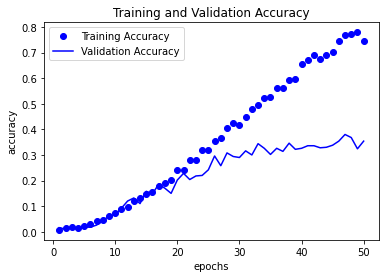

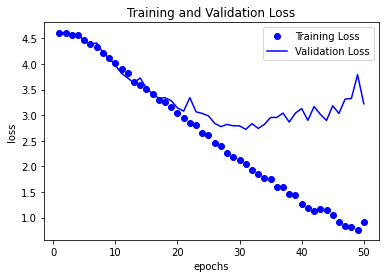

In [61]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Data Augmentation

In [69]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_gen = ImageDataGenerator(rescale=1./255)

train = train_gen.flow_from_directory(
    '/content/drive/MyDrive/keras_sport/train',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

test = test_gen.flow_from_directory(
    '/content/drive/MyDrive/keras_sport/test',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

validation = test_gen.flow_from_directory(
    '/content/drive/MyDrive/keras_sport/valid',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

Found 13572 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [70]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(512, (3,3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 17, 17, 128)     

In [71]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [72]:
history = model.fit(
    train,
    steps_per_epoch=75,
    epochs=100,
    validation_data=validation,
)

Epoch 1/100
75/75 [==============================] - 37s 479ms/step - loss: 4.5869 - acc: 0.0116 - val_loss: 4.5599 - val_acc: 0.0100
Epoch 2/100
75/75 [==============================] - 37s 488ms/step - loss: 4.5346 - acc: 0.0194 - val_loss: 4.5204 - val_acc: 0.0180
Epoch 3/100
75/75 [==============================] - 35s 471ms/step - loss: 4.4781 - acc: 0.0224 - val_loss: 4.4605 - val_acc: 0.0180
Epoch 4/100
75/75 [==============================] - 36s 477ms/step - loss: 4.3924 - acc: 0.0290 - val_loss: 4.3589 - val_acc: 0.0220
Epoch 5/100
75/75 [==============================] - 37s 489ms/step - loss: 4.3474 - acc: 0.0379 - val_loss: 4.3013 - val_acc: 0.0380
Epoch 6/100
75/75 [==============================] - 36s 478ms/step - loss: 4.3022 - acc: 0.0360 - val_loss: 4.2544 - val_acc: 0.0280
Epoch 7/100
75/75 [==============================] - 36s 476ms/step - loss: 4.2593 - acc: 0.0437 - val_loss: 4.2366 - val_acc: 0.0400
Epoch 8/100
75/75 [==============================] - 37s 494ms

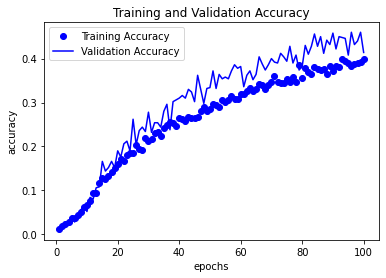

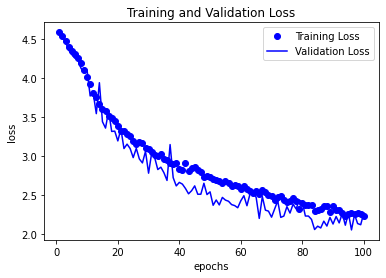

In [73]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

As shown, the overfitting reduced, however it was very difficult to train the model. As shown, it only reached ~40% accuracy with the data augmentation  despite reaching ~74% without it. The validation accuracy improved significantly, and improved quicker than that of the training accuracy.

Due to the lack of data it would be cumbersome to effectively train a CNN from scratch.

In order to combat these issues faced  by training a Convolutional Neural Network (CNN) from scratch, I will utilize a pre-trained CNN to retrain my data on (transfer learning).

# Transfer Learning

In [27]:
from keras.applications import MobileNetV2

In [28]:
conv_base = MobileNetV2(weights='imagenet',
                     include_top=False,
                     input_shape=(150,150,3))
conv_base.trainable = False

In [29]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 256)               327936    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)              

In [30]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_gen = ImageDataGenerator(rescale=1./255)

train = train_gen.flow_from_directory(
    train_path,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

test = test_gen.flow_from_directory(
    test_path,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

validation = test_gen.flow_from_directory(
    val_path,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)

Found 13572 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [31]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']   
)

In [32]:
history = model.fit(
    train,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation
)

Epoch 1/20
100/100 [==============================] - 46s 433ms/step - loss: 4.0402 - acc: 0.0994 - val_loss: 2.7230 - val_acc: 0.3480
Epoch 2/20
100/100 [==============================] - 42s 424ms/step - loss: 2.6979 - acc: 0.3110 - val_loss: 1.7375 - val_acc: 0.5260
Epoch 3/20
100/100 [==============================] - 42s 424ms/step - loss: 2.2184 - acc: 0.4164 - val_loss: 1.4773 - val_acc: 0.5860
Epoch 4/20
100/100 [==============================] - 42s 423ms/step - loss: 2.0981 - acc: 0.4438 - val_loss: 1.2934 - val_acc: 0.6300
Epoch 5/20
100/100 [==============================] - 43s 428ms/step - loss: 1.8809 - acc: 0.4884 - val_loss: 1.1723 - val_acc: 0.6540
Epoch 6/20
100/100 [==============================] - 42s 424ms/step - loss: 1.7927 - acc: 0.5030 - val_loss: 1.1542 - val_acc: 0.6600
Epoch 7/20
100/100 [==============================] - 43s 426ms/step - loss: 1.7042 - acc: 0.5303 - val_loss: 1.1456 - val_acc: 0.6520
Epoch 8/20
100/100 [==============================] - 4

In [33]:
valAcc = round(history.history['val_acc'][-1] * 100, 2)
print('Validation Accuracy: {}%'.format(valAcc))

Validation Accuracy: 76.6%


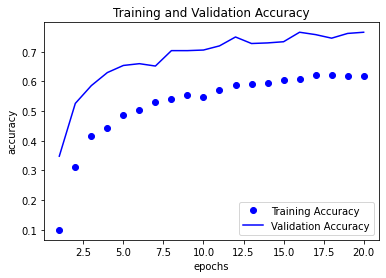

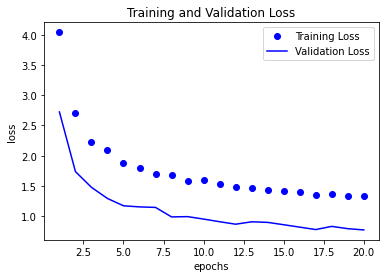

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [35]:
eval = model.evaluate(test)[-1]
final = round(eval * 100, 2)
print('Testing Accuracy: {}%'.format(final))

8/8 [==============================] - 1s 136ms/step - loss: 0.7371 - acc: 0.7800
Testing Accuracy: 78.0%
